# Explore here

Column description
- Pregnancies. Number of pregnancies of the patient (numeric)
- Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
- SkinThickness. Triceps skin fold thickness (measured in mm) (numeric)
- Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
- BMI. Body mass index (numeric)
- DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
- Age. Age of patient (numeric)
- Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

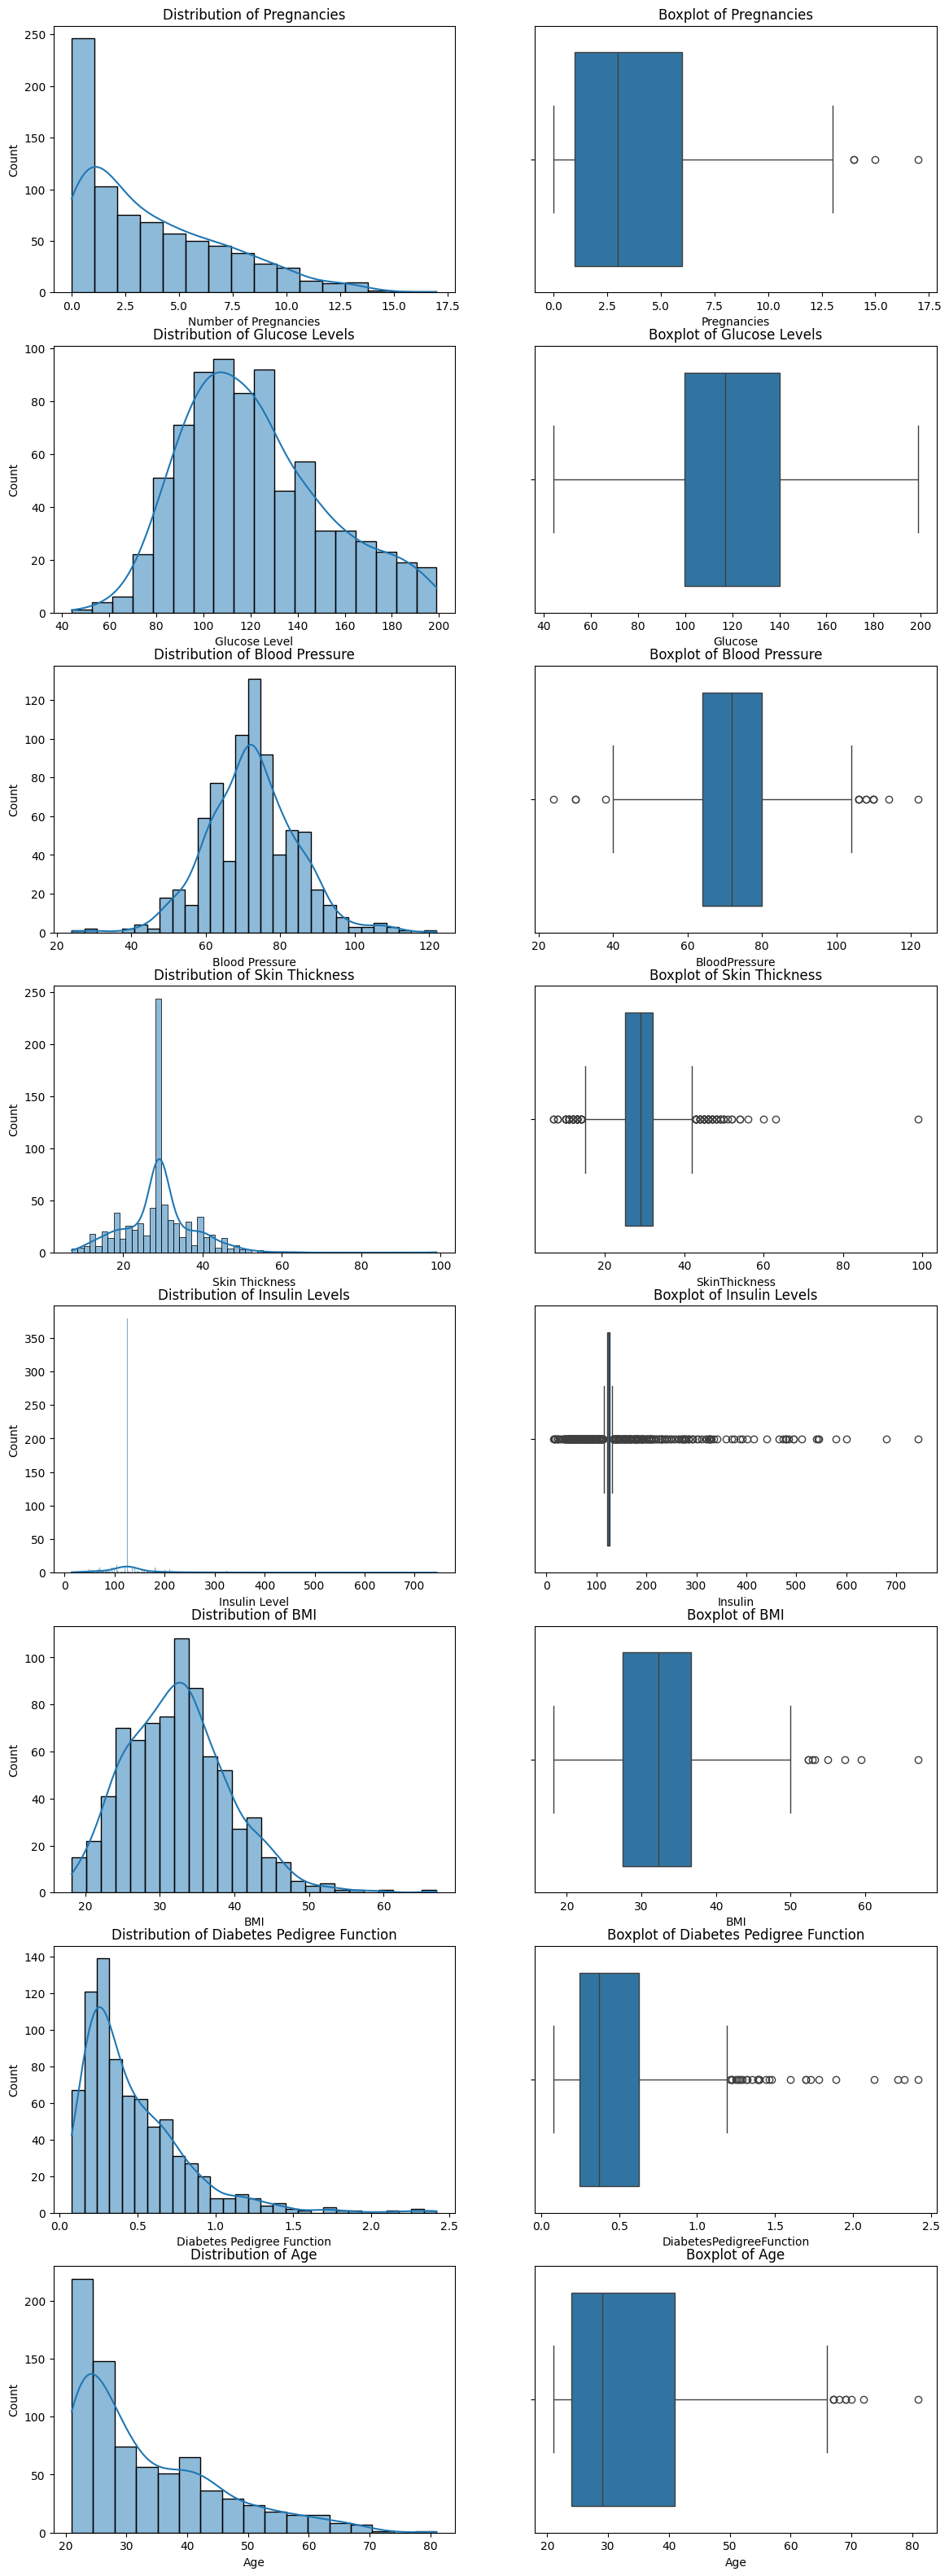

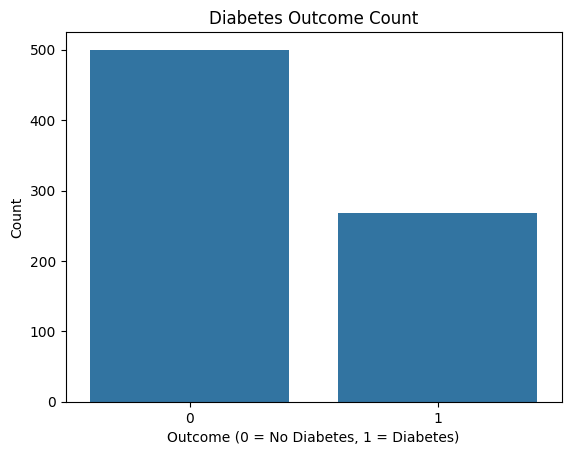

<Figure size 1200x800 with 0 Axes>

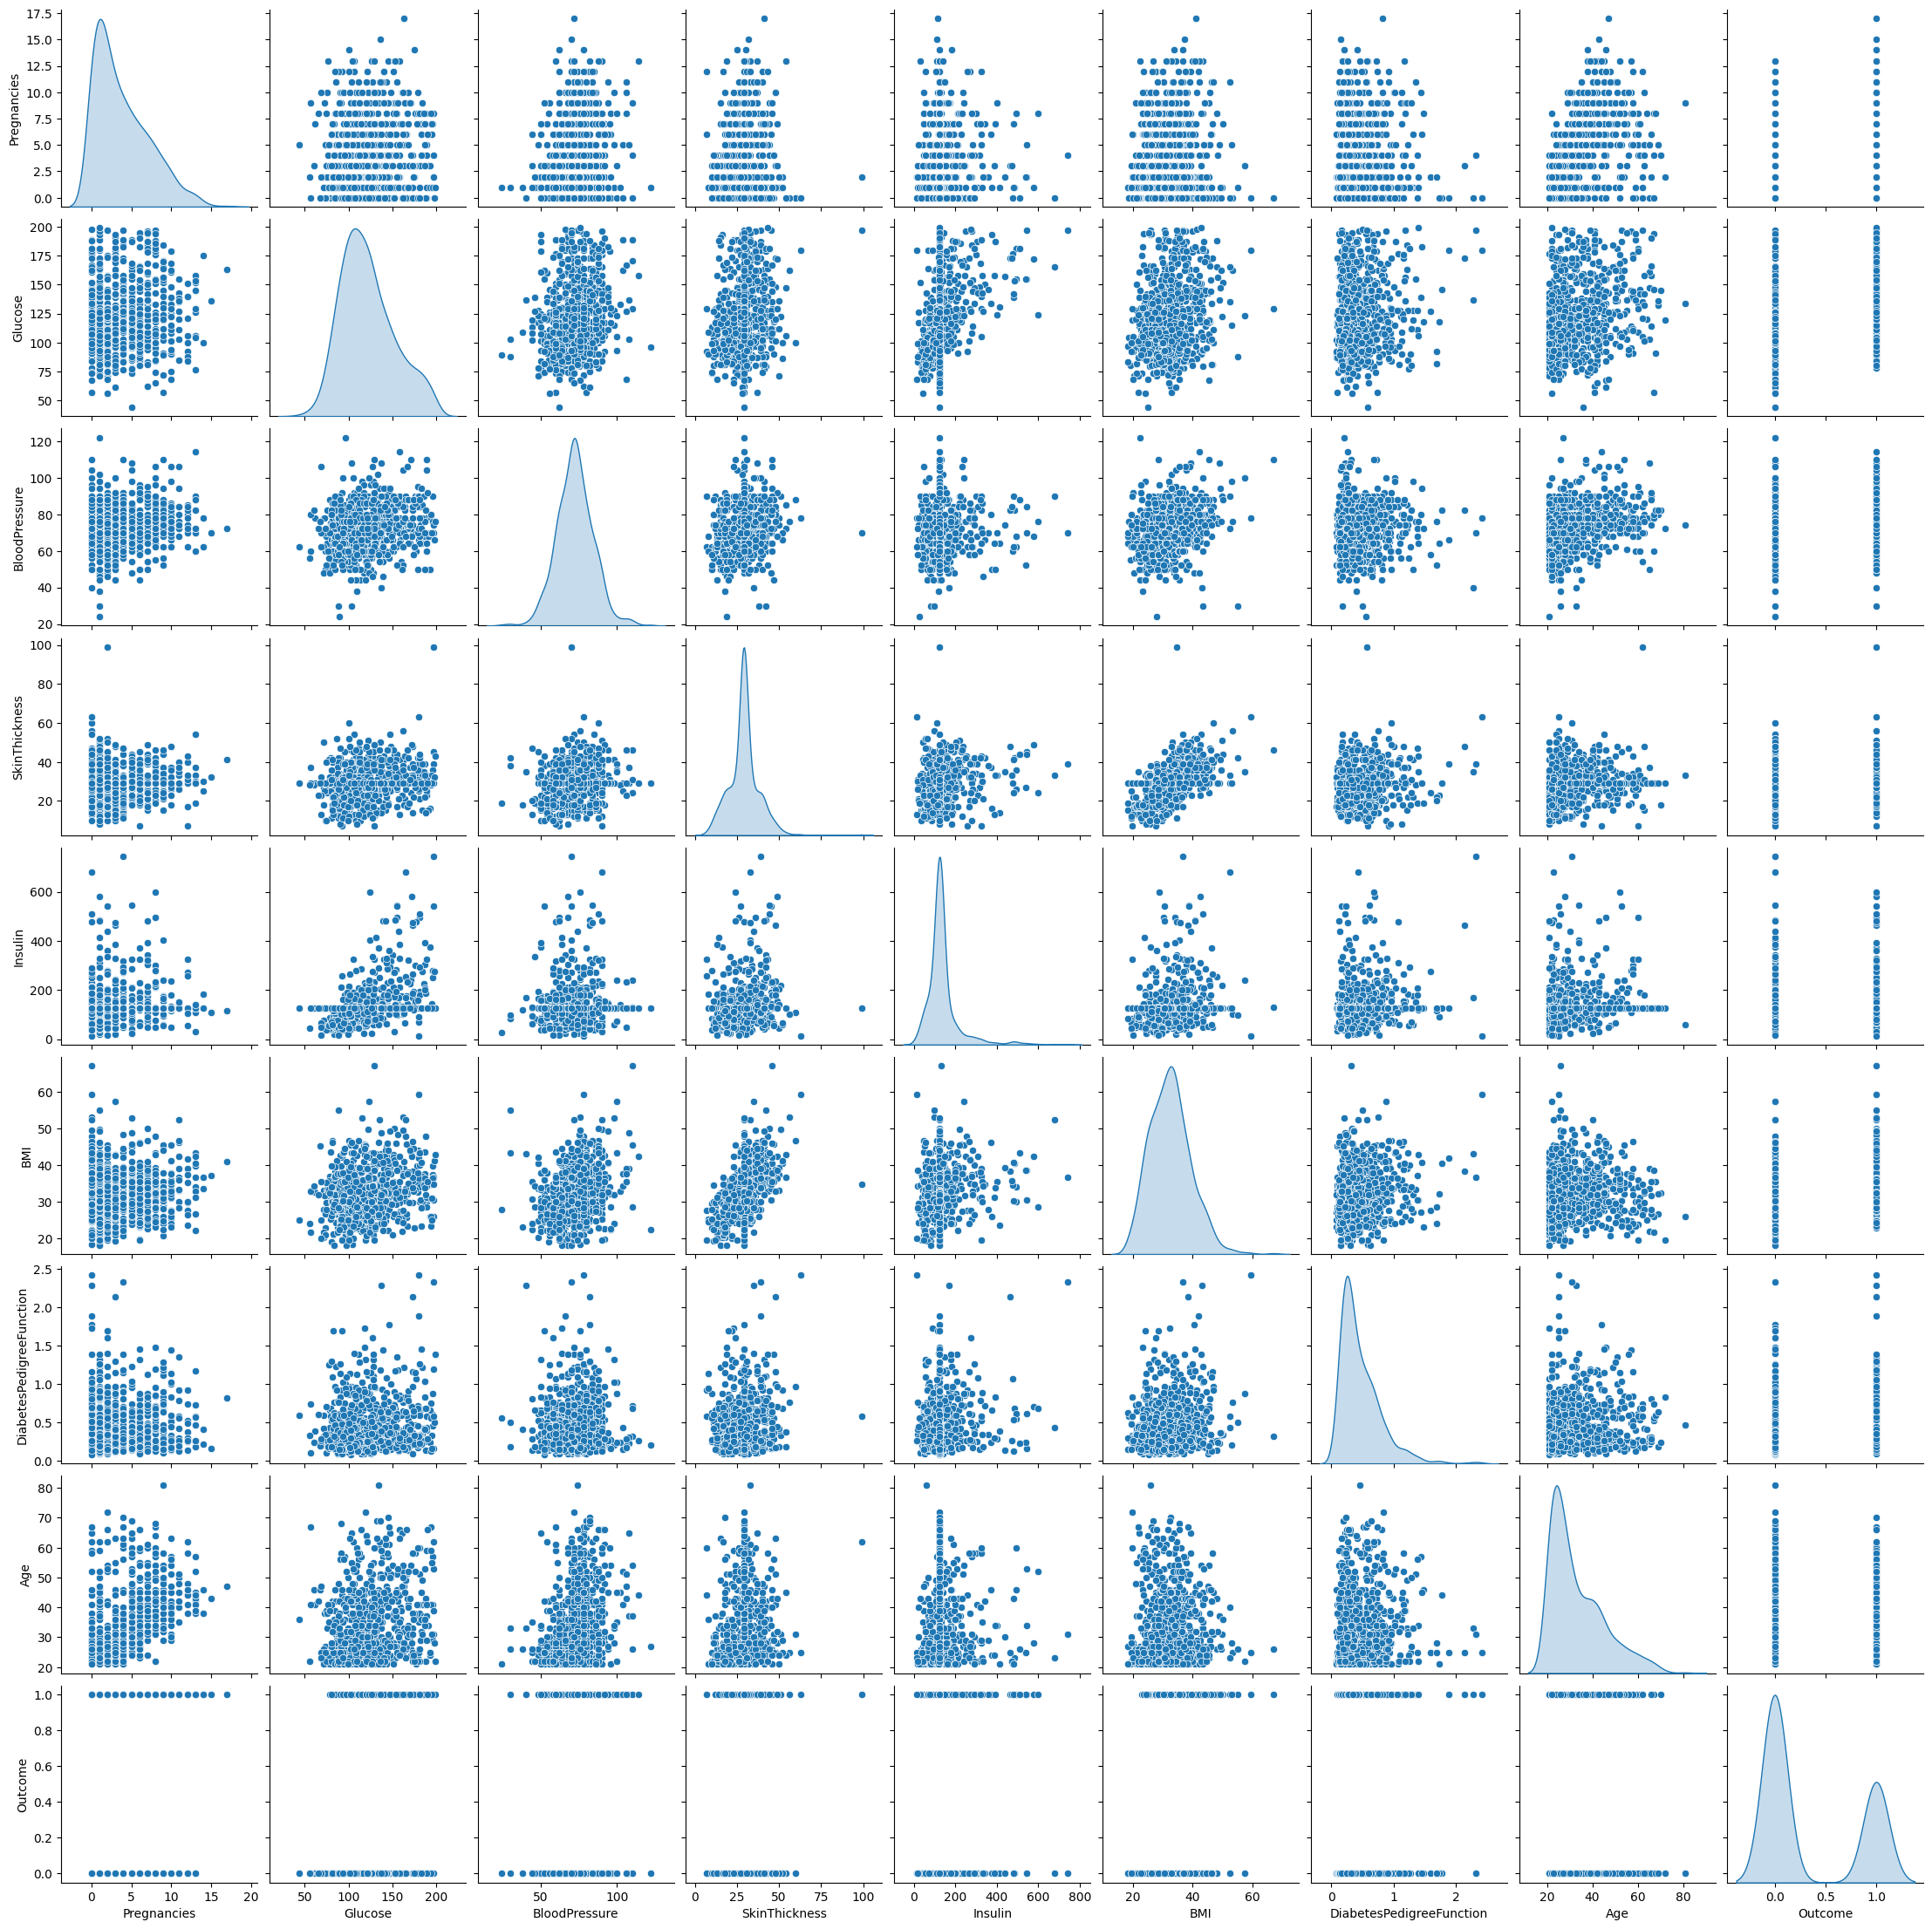

<Figure size 1200x800 with 0 Axes>

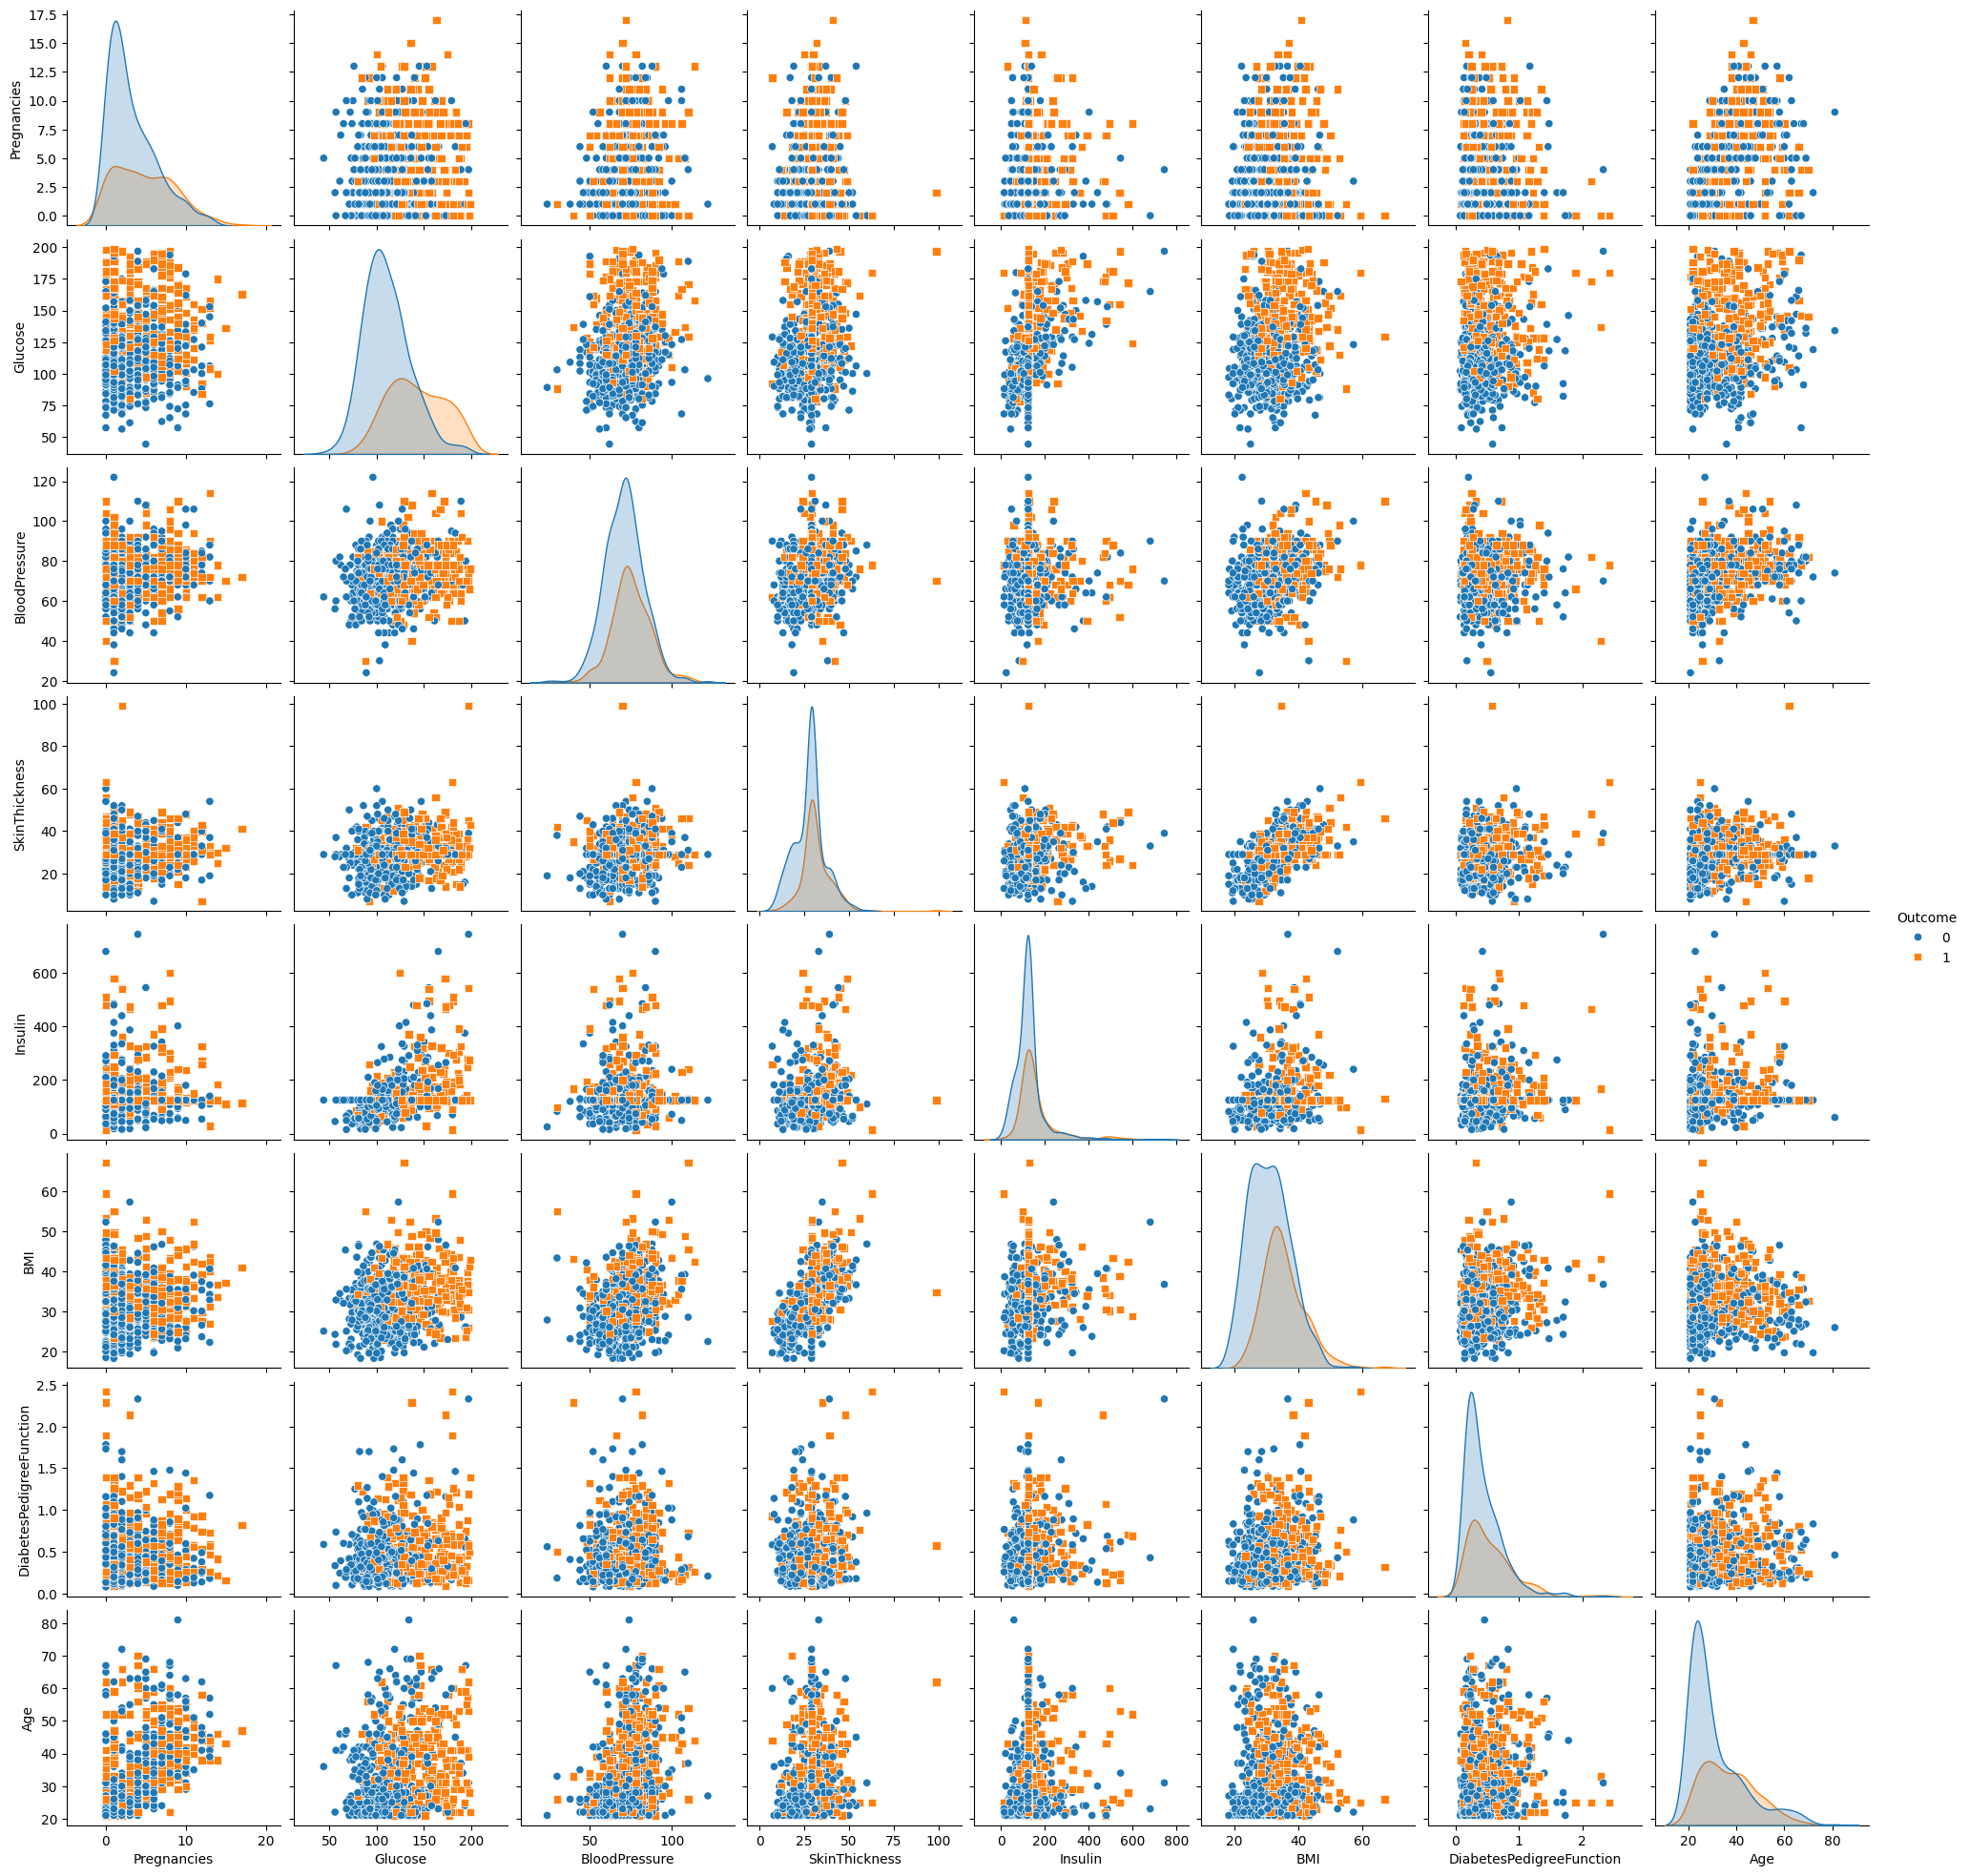

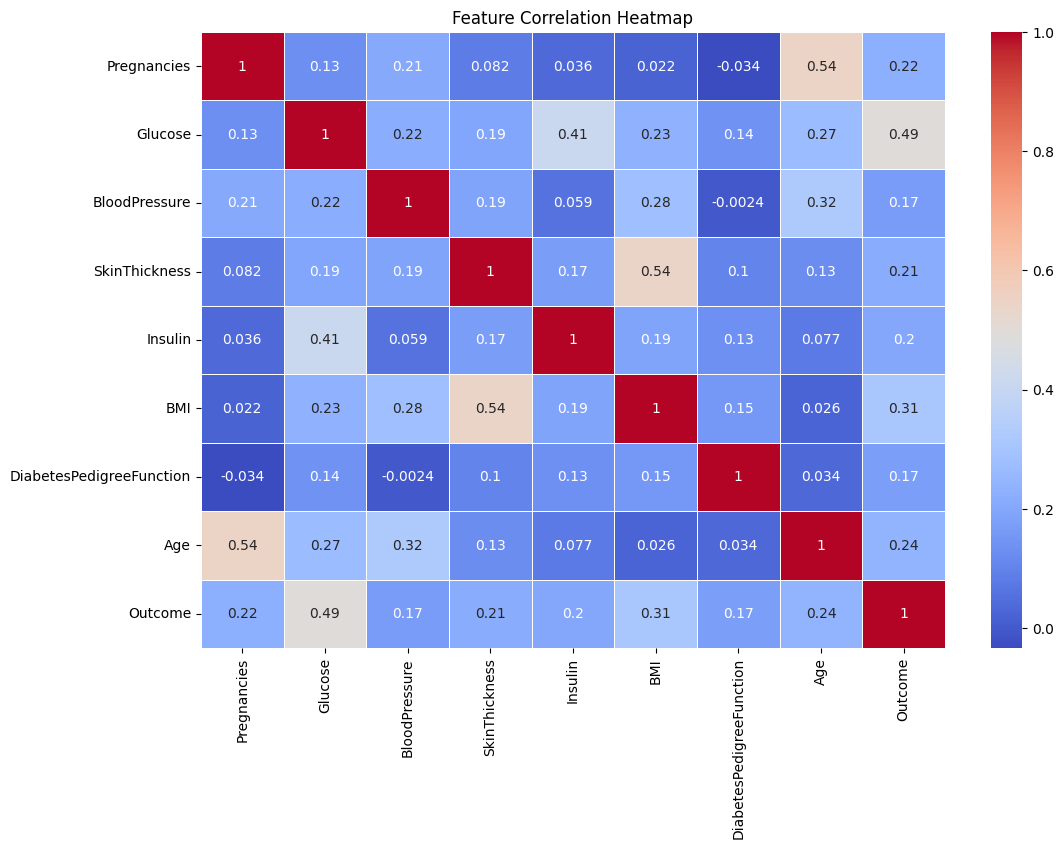

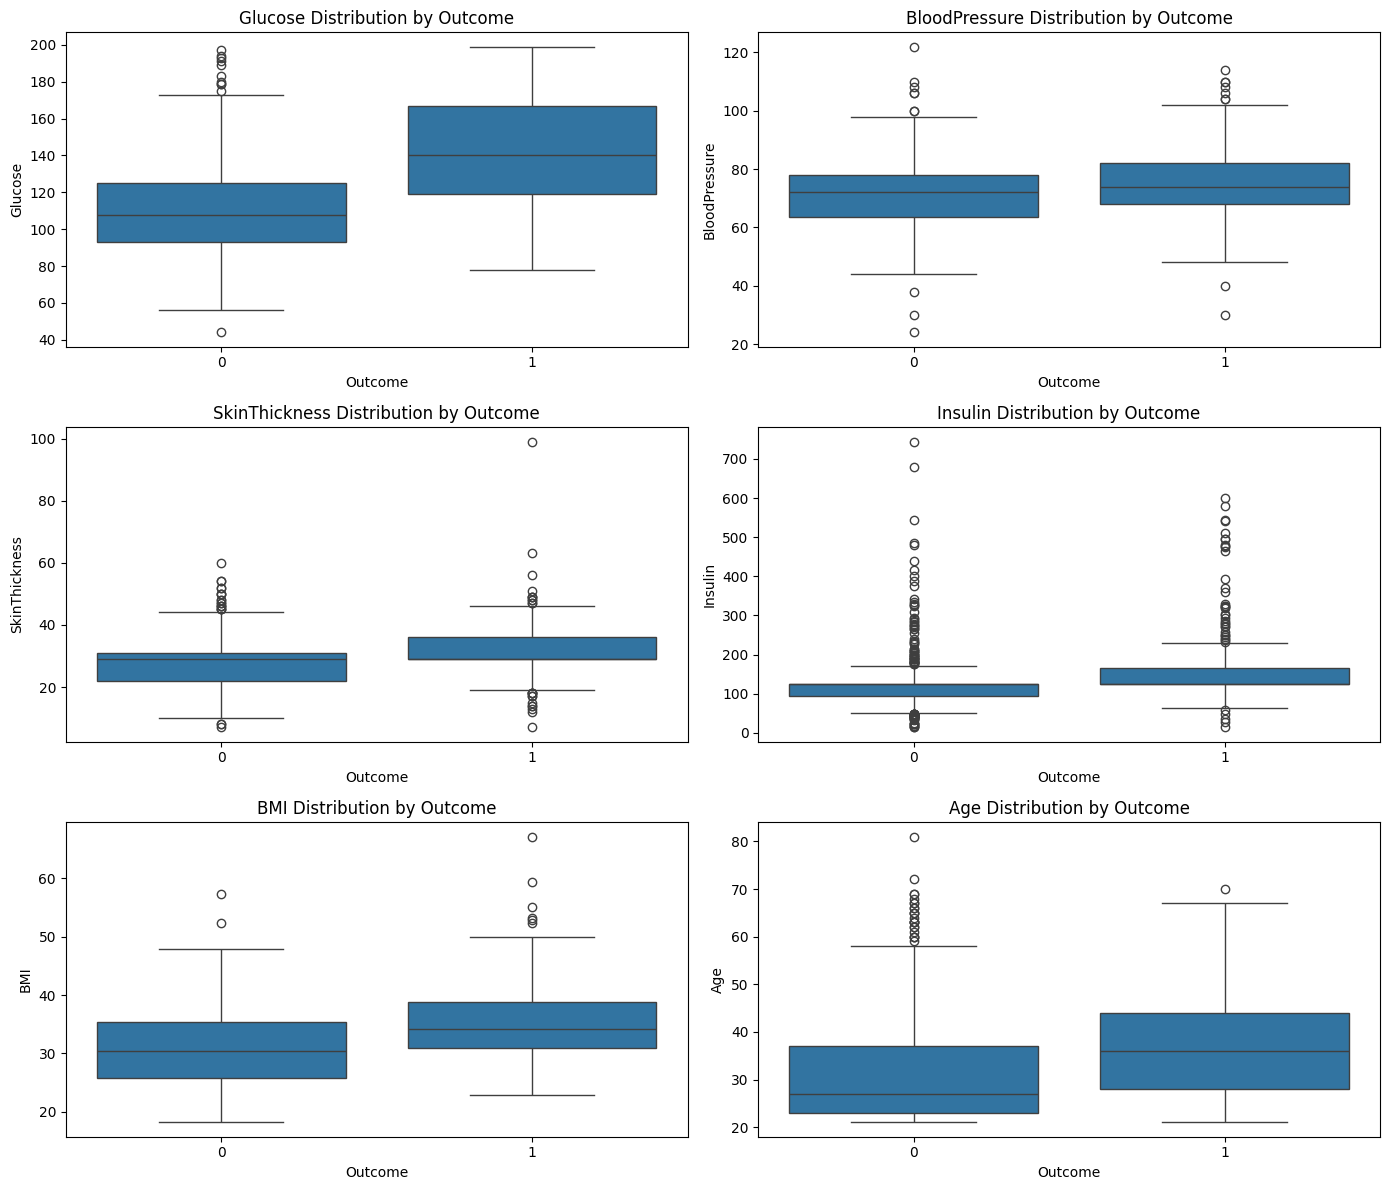

<Figure size 1200x1000 with 0 Axes>

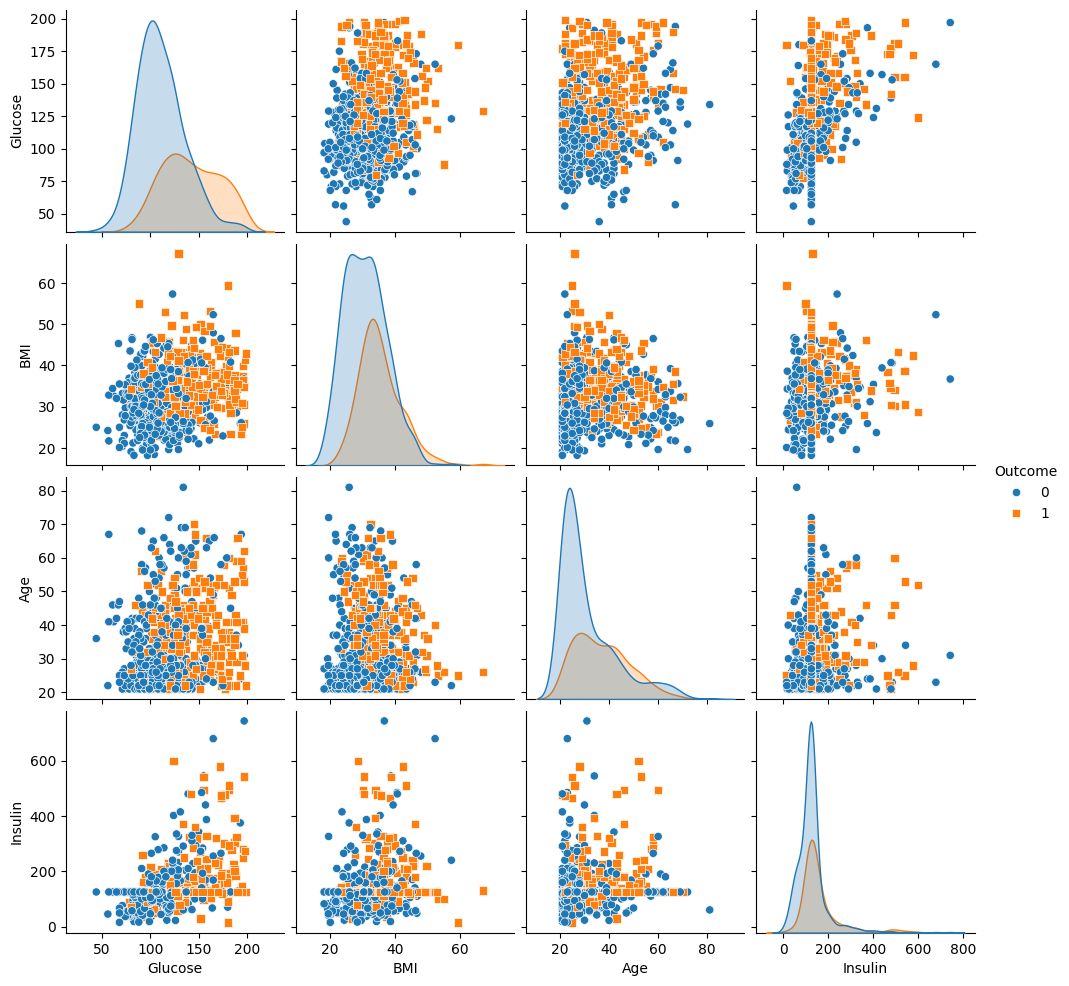

Model accuracy: 0.6753246753246753
🔹 Best hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 117, 'splitter': 'best'}
Optimized model accuracy: 0.7727272727272727


In [5]:
# Your code here
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
print(diabetes_data.head())
print(diabetes_data.info())
print(diabetes_data.describe())

# Handle duplicates
if diabetes_data.duplicated().sum() != 0:
    diabetes_data = diabetes_data.drop_duplicates()

# Handle outliers
invalid_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[invalid_zero_columns] = diabetes_data[invalid_zero_columns].replace(0, np.nan)

for col in invalid_zero_columns:
    diabetes_data[col] = diabetes_data[col].fillna(diabetes_data[col].median())


highest_insulin = diabetes_data[diabetes_data['Insulin'] == 846]
diabetes_data.loc[highest_insulin.index, 'Insulin'] = diabetes_data["Insulin"].median()
print(f'🔹 Highest insulin level patient: {diabetes_data.loc[highest_insulin.index]}')

# Handle null values
print(diabetes_data.isnull().sum())  
print(diabetes_data.describe())  

# Univariate analysis
fig, axis = plt.subplots(8,2, figsize=(14,40))
sns.histplot(ax=axis[0,0], data=diabetes_data, x='Pregnancies', kde=True)
axis[0,0].set_title("Distribution of Pregnancies")
axis[0,0].set_xlabel("Number of Pregnancies")
axis[0,0].set_ylabel("Count")
sns.boxplot(ax=axis[0,1], data=diabetes_data, x='Pregnancies')
axis[0,1].set_title("Boxplot of Pregnancies")
sns.histplot(ax=axis[1,0], data=diabetes_data, x='Glucose', kde=True)
axis[1,0].set_title("Distribution of Glucose Levels")
axis[1,0].set_xlabel("Glucose Level")
axis[1,0].set_ylabel("Count")
sns.boxplot(ax=axis[1,1], data=diabetes_data, x='Glucose')
axis[1,1].set_title("Boxplot of Glucose Levels")
sns.histplot(ax=axis[2,0], data=diabetes_data, x='BloodPressure', kde=True)
axis[2,0].set_title("Distribution of Blood Pressure")
axis[2,0].set_xlabel("Blood Pressure")
axis[2,0].set_ylabel("Count")
sns.boxplot(ax=axis[2,1], data=diabetes_data, x='BloodPressure')
axis[2,1].set_title("Boxplot of Blood Pressure")
sns.histplot(ax=axis[3,0], data=diabetes_data, x='SkinThickness', kde=True)
axis[3,0].set_title("Distribution of Skin Thickness")
axis[3,0].set_xlabel("Skin Thickness")
axis[3,0].set_ylabel("Count")
sns.boxplot(ax=axis[3,1], data=diabetes_data, x='SkinThickness')
axis[3,1].set_title("Boxplot of Skin Thickness")
sns.histplot(ax=axis[4,0], data=diabetes_data, x='Insulin', kde=True)
axis[4,0].set_title("Distribution of Insulin Levels")
axis[4,0].set_xlabel("Insulin Level")
axis[4,0].set_ylabel("Count")
sns.boxplot(ax=axis[4,1], data=diabetes_data, x='Insulin')
axis[4,1].set_title("Boxplot of Insulin Levels")
sns.histplot(ax=axis[5,0], data=diabetes_data, x='BMI', kde=True)
axis[5,0].set_title("Distribution of BMI")
axis[5,0].set_xlabel("BMI")
axis[5,0].set_ylabel("Count")
sns.boxplot(ax=axis[5,1], data=diabetes_data, x='BMI')
axis[5,1].set_title("Boxplot of BMI")
sns.histplot(ax=axis[6,0], data=diabetes_data, x='DiabetesPedigreeFunction', kde=True)
axis[6,0].set_title("Distribution of Diabetes Pedigree Function")
axis[6,0].set_xlabel("Diabetes Pedigree Function")
axis[6,0].set_ylabel("Count")
sns.boxplot(ax=axis[6,1], data=diabetes_data, x='DiabetesPedigreeFunction')
axis[6,1].set_title("Boxplot of Diabetes Pedigree Function")
sns.histplot(ax=axis[7,0], data=diabetes_data, x='Age', kde=True)
axis[7,0].set_title("Distribution of Age")
axis[7,0].set_xlabel("Age")
axis[7,0].set_ylabel("Count")
sns.boxplot(ax=axis[7,1], data=diabetes_data, x='Age')
axis[7,1].set_title("Boxplot of Age")

plt.figure()
sns.countplot(data=diabetes_data, x='Outcome')
plt.title("Diabetes Outcome Count")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")

# Multivariate analysis
plt.figure(figsize=(12, 8))
sns.pairplot(diabetes_data, diag_kind="kde")
plt.show()

plt.figure(figsize=(12, 8))
sns.pairplot(diabetes_data, hue="Outcome", diag_kind="kde", markers=["o", "s"])
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

plt.figure(figsize=(14, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x="Outcome", y=feature, data=diabetes_data)
    plt.title(f"{feature} Distribution by Outcome")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
sns.pairplot(diabetes_data, vars=['Glucose', 'BMI', 'Age', 'Insulin'], hue="Outcome", markers=["o", "s"])

plt.show()

from sklearn.model_selection import train_test_split

X = diabetes_data.drop(['Outcome'], axis=1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=117)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(y_test, y_pred)

print(f'Model accuracy: {model_accuracy}')

from sklearn.model_selection import GridSearchCV

hyperparams = {
    'criterion': ['gini', 'entropy'],  # Splitting strategy
    'splitter': ['best', 'random'],  # How to split nodes
    'max_depth': [None, 5, 10, 15, 20],  # Depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 5, 10],  # Min samples per leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Max features considered per split
    'class_weight': [None, 'balanced'],  # Adjust for class imbalance
    'random_state': [117]  # Ensuring reproducibility
}

grid = GridSearchCV(model, hyperparams, scoring='accuracy', cv=5)

# Suppress warnings due to incopatibilities or converges
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)
print(f'🔹 Best hyperparameters: {grid.best_params_}')

# 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 117, 'splitter': 'best'

opt_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, max_features= None, min_samples_leaf= 10, min_samples_split= 2, random_state= 117)

opt_model.fit(X_train, y_train)
opt_pred = opt_model.predict(X_test)

opt_accuracy = accuracy_score(y_test, opt_pred)
print(f'Optimized model accuracy: {opt_accuracy}')

### Step 1: Load Required Libraries
# This step imports necessary libraries for data manipulation, visualization, and machine learning.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


### Step 2: Load and Inspect the Dataset
# The dataset is loaded from a CSV file. We print the first few rows,
# summary statistics, and data types to understand its structure.

In [ ]:
diabetes_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
print(diabetes_data.head())  # Display first few rows
print(diabetes_data.info())  # Data types and missing values
print(diabetes_data.describe())  # Summary statistics

### Step 3: Handle Duplicate Values
# Check for duplicate rows and remove them if any exist.

In [ ]:
print(f'Duplicate values: {diabetes_data.duplicated().sum()}')
if diabetes_data.duplicated().sum() != 0:
    diabetes_data.drop_duplicates(inplace=True)

### Step 4: Handle Outliers and Missing Values
# Replace zero values in select columns with NaN and fill them with the median

In [ ]:
invalid_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[invalid_zero_columns] = diabetes_data[invalid_zero_columns].replace(0, np.nan)
for col in invalid_zero_columns:
    diabetes_data[col] = diabetes_data[col].fillna(diabetes_data[col].median())

# Adjust extreme insulin values.

In [ ]:
highest_insulin = diabetes_data[diabetes_data['Insulin'] == 846]
diabetes_data.loc[highest_insulin.index, 'Insulin'] = diabetes_data["Insulin"].median()

print(diabetes_data.isnull().sum())  # Confirm missing values handled
print(diabetes_data.describe())  # Recheck statistics

### Step 5: Univariate Data Analysis
# Visualize distributions of numerical variables.
# Observations:
# - Glucose, BMI, and Age show normal-like distributions with some skewness.
# - Insulin has a right-skewed distribution with extreme values.
# - Box plots indicate the presence of potential outliers, particularly in Insulin and BMI.
# - Higher glucose levels are more common among diabetic patients.

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(14, 20))
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i, feature in enumerate(features):
    sns.histplot(data=diabetes_data, x=feature, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()
# Visualize distributions of numerical variables.
fig, axes = plt.subplots(4, 2, figsize=(14, 20))
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i, feature in enumerate(features):
    sns.histplot(data=diabetes_data, x=feature, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

### Step 6: Multivariate Data Analysis
# Analyze relationships between features using correlation heatmap.
# Observations:
# - Glucose shows a strong positive correlation with diabetes outcome, making it a key predictor.
# - BMI and Age also have moderate correlations with the Outcome variable.
# - The heatmap confirms a strong link between Insulin and SkinThickness, likely due to their medical relationship.

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
# Analyze relationships between features using correlation heatmap.
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Step 7: Train-Test Split
# Split the dataset into training and test sets for model evaluation.

In [ ]:
X = diabetes_data.drop(['Outcome'], axis=1)
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)


### Step 8: Train Decision Tree Model
# Fit a Decision Tree classifier on the training data.

In [ ]:
model = DecisionTreeClassifier(random_state=117)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Step 9: Evaluate Model Performance
# Calculate accuracy of the trained model.

In [ ]:
model_accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {model_accuracy}')

### Step 10: Hyperparameter Tuning
# Optimize the Decision Tree model using GridSearchCV.

In [ ]:
hyperparams = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
    'random_state': [117]
}

grid = GridSearchCV(model, hyperparams, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
print(f'Best hyperparameters: {grid.best_params_}')

### Step 11: Train Optimized Decision Tree Model
# Train a Decision Tree with the best hyperparameters.

In [ ]:
best_params = grid.best_params_
opt_model = DecisionTreeClassifier(**best_params)
opt_model.fit(X_train, y_train)
opt_pred = opt_model.predict(X_test)
opt_accuracy = accuracy_score(y_test, opt_pred)
print(f'Optimized model accuracy: {opt_accuracy}')